Basics of OpenCV

A. Reading and Writing Images. 

Below, we read a tomato image, once as a color image, and then, as a grayscale image.

In [50]:
import cv2

In [51]:
im1 = cv2.imread('tomato.jpg', cv2.IMREAD_COLOR)
cv2.imshow("Tomato", im1)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [52]:
im2 = cv2.imread('tomato.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow("Gray tomato", im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Let's look at some attributes of images: 

In [4]:
print('The color image has a shape of: ', im1.shape)
print('The grayscale image has a shape of: ', im2.shape)

The color image has a shape of:  (612, 612, 3)
The grayscale image has a shape of:  (612, 612)


Notably, the color image has three separate channels. One for each of the colors. Let's splice them and look at each layer one by one. 

In [53]:
im1 = cv2.imread('dustbins.png', cv2.IMREAD_COLOR)
im1_ch1 = im1[:,:,0]; im1_ch2 = im1[:,:,1];  im1_ch3 = im1[:,:,2];
cv2.imshow('channel 1 of tomato', im1_ch1) #This is the blue channel
cv2.imshow('channel 2 of tomato', im1_ch2) #This is the green channel
cv2.imshow('channel 3 of tomato', im1_ch3) #This is the red channel
cv2.waitKey(0); cv2.destroyAllWindows()

Task: Make a neat image in mspaint - take a canvas of a desired size and make a circle in the middle of this frame. In this circle, put in a fill color. Make 3 such images, 1: Blue, 2: Green, 3: Red. Import them and inspect the 3 channels of the images. Print out the actual array and see whether the blue circle shows 255 in the blue channel and 0 in the other (depending on the kind of blue you choose!). 


Apart from showing the image in CV2, we can alternately show the image in matplotlib. THe benefit of using matplotlib is the possibility to modify the plot based on various textboxes and arrows overlaid on the image itself. Another distinct advantage it has is the possibility to show the image directly in jupyter lab without having to have a separate window. This improves the readability of the document significantly as we do not have to jump across windows. THis is not so straightforward in the cv2.imshow function. To do this we must **convert** the image from the BGR format to an RGB format. This is most easily done as follows:

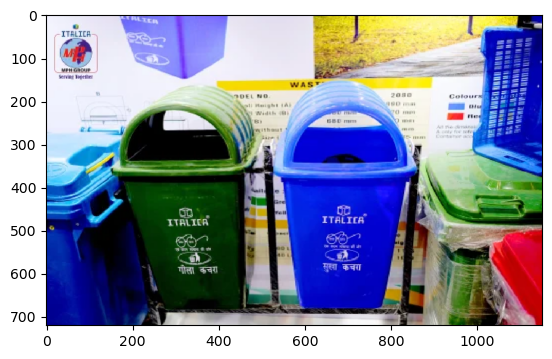

In [6]:
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(im2)

We may save the file to disk by using cv2.imwrite() command. This is shown below.

In [7]:
save_flag = cv2.imwrite('poor_quality_images_dustbins.jpg', im2, [cv2.IMWRITE_JPEG_QUALITY, 50])
if save_flag == True:
    print('File saved successfully to PWD')
else: 
    print('Unable to save file to PWD. Check privileges.')

print('--------------------')
print('List of files in PWD')
print('--------------------')
import os
for file in os.listdir():
    print(file)


File saved successfully to PWD
--------------------
List of files in PWD
--------------------
.ipynb_checkpoints
.virtual_documents
blue_curve.png
dustbins.png
image_manual_processing.png
image_processing_primer.ipynb
lec-2-plotting.ipynb
lec-3-gradient-descent-interpolation.ipynb
morphological_operations.png
morpho_3.png
morph_2.png
P5_PAN_CD_N20_000_E084_000_30m.jpg
poor_lighting.gif
poor_lighting.jpg
poor_quality_images_dustbins.jpg
Python 2024 student_rollList.xls
Python resources
red_ring.png
tomato.jpg
Untitled.ipynb
Untitled1.ipynb
Week1.ipynb
wingdata.ipynb
wingdata.txt


Let's quickly analyze the red ring that we have created in mspaint. 

uint8
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255  36  36  36  36 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255  36  36  36  36  36  36  36  36 255 255 255 255
  255 255]
 [255 255 255 255 255  36  36  36  36  36  36  36  36  36  36 255 255 255
  255 255]
 [255 255 255 255 255  36  36  36  36  36  36  36  36  36  36 255 255 255
  255 255]
 [255 255 255 255  36  36  36  36  36  36  36  36  36  36  36  36 255 255
  255 255]
 [255 255 255 255  36  36  36  36  36 255 255  36  36  36  36  36 255 255
  255 255]
 [255 255 255 255  36  36  36  36  36 255 255  36  36  36  36  36 255 255
  255 255]
 [255 255 255 255  36  36  36  36  36  36  36  36  36  36  36  36 255 255
  255 255]
 [255 255 255 255 255  36  36  36  36  36  36  36  36  36  

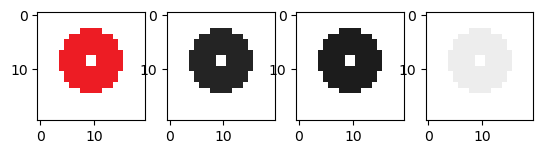

In [55]:
im1 = cv2.imread('red_ring.png', cv2.IMREAD_COLOR)
im1_b, im1_g, im1_r = cv2.split(im1)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,1); plt.imshow(im1)
plt.subplot(1,4,2); plt.imshow(im1_b, vmin = 0, vmax = 255); #plt.gca().set_aspect('equal')
plt.subplot(1,4,3); plt.imshow(im1_g, vmin = 0, vmax = 255); #vmin and vmax set the max and min of the data
plt.subplot(1,4,4); plt.imshow(im1_r, vmin = 0, vmax = 255);
print(im1_r.dtype)
print(im1_b)

We can now look at combining multiple images through a pixel-wise addition

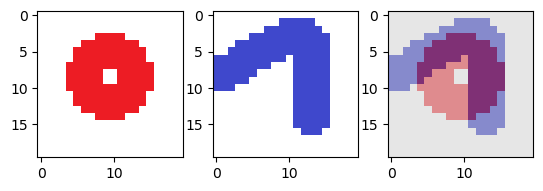

In [58]:
im1 = cv2.imread('red_ring.png', cv2.IMREAD_COLOR)
im2 = cv2.imread('blue_curve.png', cv2.IMREAD_COLOR)
im3 = cv2.addWeighted(im1,0.4 ,im2, 0.5, 0.5)
# Change the factors to see how the 255- white can go to gray. 
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB); im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB); im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,1); plt.imshow(im1)
plt.subplot(1,3,2); plt.imshow(im2)
plt.subplot(1,3,3); plt.imshow(im3, vmin = 0, vmax = 255)

OpenCV also allows for boolean operations. 

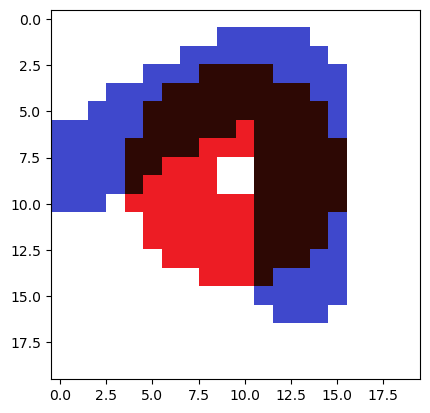

In [10]:
im1 = cv2.imread('red_ring.png', cv2.IMREAD_COLOR)
im2 = cv2.imread('blue_curve.png', cv2.IMREAD_COLOR)
im_and = cv2.bitwise_and(im1, im2, mask = None)
plt.imshow(cv2.cvtColor(im_and, cv2.COLOR_BGR2RGB)) 

We can now look at various morphological operations. Let's first see erode. 

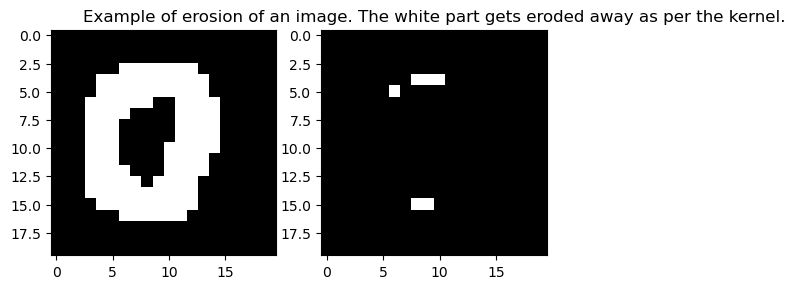

In [60]:
import numpy as np
#im0 = cv2.imread('morphological_operations.png', cv2.IMREAD_GRAYSCALE)
im0 = cv2.imread('morph_2.png', cv2.IMREAD_COLOR)
im1 = cv2.erode(im0, np.ones((3,5), np.uint8), iterations=1)
plt.subplot(1,2,1); plt.imshow(im0)
plt.subplot(1,2,2); plt.imshow(im1) 
plt.title('Example of erosion of an image. The white part gets eroded away as per the kernel.');

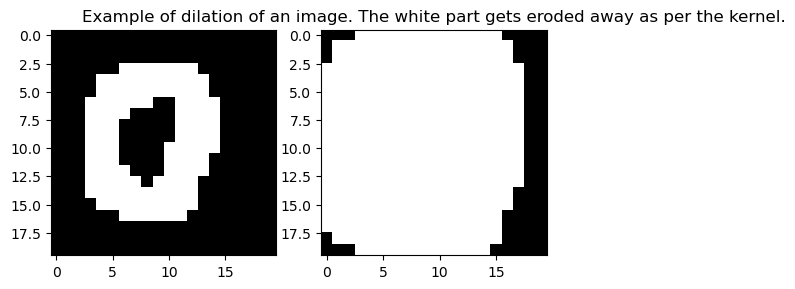

In [63]:
import numpy as np
#im0 = cv2.imread('morphological_operations.png', cv2.IMREAD_GRAYSCALE)
im0 = cv2.imread('morph_2.png', cv2.IMREAD_COLOR)
im1 = cv2.dilate(im0, np.ones((3,3), np.uint8), iterations=3)
plt.subplot(1,2,1); plt.imshow(im0)
plt.subplot(1,2,2); plt.imshow(im1) 
plt.title('Example of dilation of an image. The white part gets eroded away as per the kernel.');

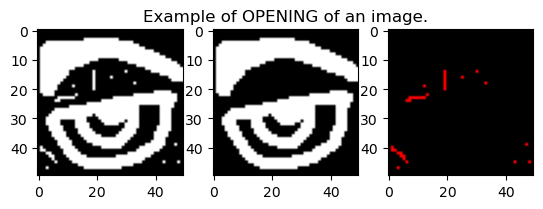

In [65]:
import numpy as np
#im0 = cv2.imread('morphological_operations.png', cv2.IMREAD_GRAYSCALE)
im0 = cv2.imread('morpho_3.png', cv2.IMREAD_COLOR)
im1 = cv2.morphologyEx(im0, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
plt.subplot(1,3,1); plt.imshow(im0)
plt.subplot(1,3,2); plt.imshow(im1) 
plt.title('Example of OPENING of an image.');
im0 = cv2.cvtColor(im0, cv2.COLOR_BGR2GRAY);  im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY);
im2 = np.zeros((50,50,3), np.uint8); #im2[:,:,0] = cv2.bitwise_and(im0,im1, mask=None); 
im2[:,:,2] = cv2.bitwise_xor(im0, im1, mask=None); 
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))

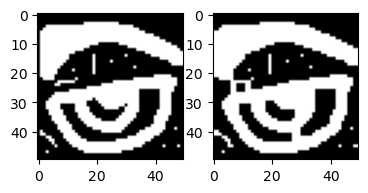

In [14]:
import numpy as np
#im0 = cv2.imread('morphological_operations.png', cv2.IMREAD_GRAYSCALE)
im0 = cv2.imread('morpho_3.png', cv2.IMREAD_COLOR)
im1 = cv2.morphologyEx(im0, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
plt.subplot(1,3,1); plt.imshow(im0)
plt.subplot(1,3,2); plt.imshow(im1) 

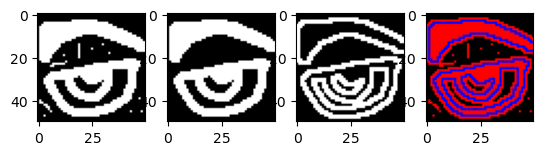

In [15]:
import numpy as np
#im0 = cv2.imread('morphological_operations.png', cv2.IMREAD_GRAYSCALE)
im01 = cv2.imread('morpho_3.png', cv2.IMREAD_COLOR)
im0 = cv2.morphologyEx(im01, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
im1 = cv2.morphologyEx(im0, cv2.MORPH_GRADIENT, np.ones((3,3), np.uint8))
plt.subplot(1,4,1); plt.imshow(im01)
plt.subplot(1,4,2); plt.imshow(im0) 
plt.subplot(1,4,3); plt.imshow(im1)
im01 = cv2.cvtColor(im01, cv2.COLOR_BGR2GRAY);  im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY);
im2 = np.zeros((50,50,3), np.uint8); im2[:,:,0] = cv2.bitwise_and(im01,im1, mask=None); im2[:,:,2] = cv2.bitwise_xor(im01, im1, mask=None); 
plt.subplot(1,4,4); plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))

In [16]:
# Utilizing different shaped kernels
# Rectangular Kernel
print(cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


Let's now manually do many point-wise operations on images. These are often the starting points in the analysis of images. 

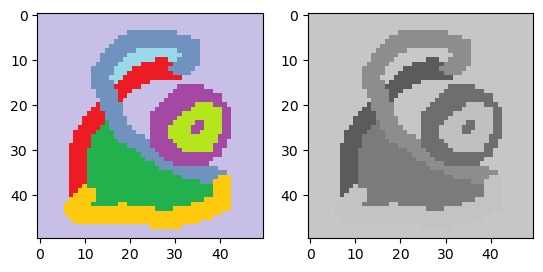

In [17]:
im01 = cv2.imread('image_manual_processing.png', cv2.IMREAD_COLOR)
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(im01, cv2.COLOR_BGR2RGB));
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(im01, cv2.COLOR_BGR2GRAY), vmin = 0, vmax = 255); plt.set_cmap('gray')

Let's look at how thresholding works with the help of 1D arrays. 

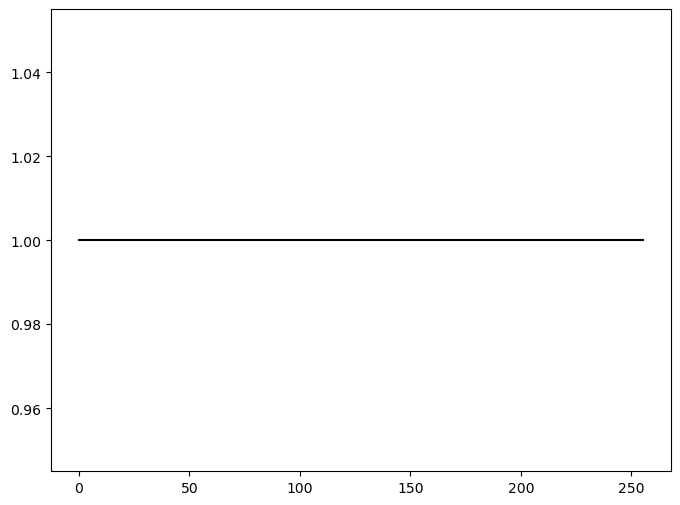

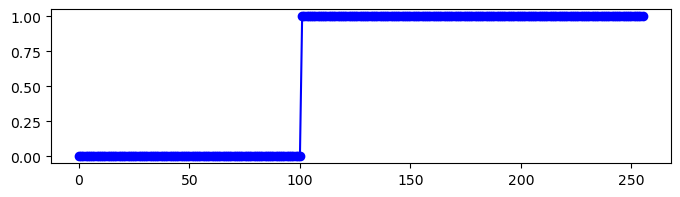

In [66]:
linear_array = np.linspace(0, 255, num=256, dtype=np.uint8)
hist = cv2.calcHist([linear_array], [0], None, [256], [0, 256])
plt.figure(figsize=(8, 6))
plt.plot(hist, color='black')
threshold_value = 100
_, thresholded_array = cv2.threshold(linear_array, threshold_value, 1, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 2))
plt.plot(thresholded_array, 'o-', color='blue')

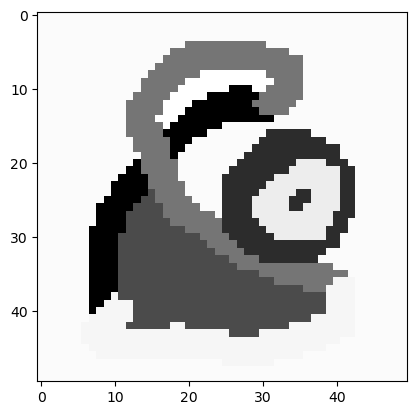

interactive(children=(IntSlider(value=100, description='threshold_val', max=200, min=100, step=10), Output()),…

In [67]:
im02 = cv2.cvtColor(im01, cv2.COLOR_BGR2GRAY)
plt.imshow(im02)

from ipywidgets import interactive
def apply_threshold(threshold_val = 100):
    _, t_img = cv2.threshold(im02, threshold_val, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(4,4))
    plt.imshow(t_img, cmap = 'gray')
    plt.show()
w = interactive(apply_threshold, threshold_val = (100, 200, 10))
w
#apply_threshold(150)

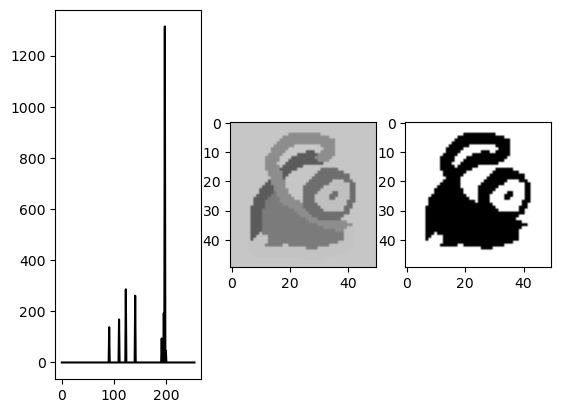

In [20]:
hist = cv2.calcHist([im02], [0], None, [256], [0, 256])
plt.subplot(1,3,1); plt.plot(hist, 'k')
plt.subplot(1,3,2); plt.imshow(im02, vmin = 0, vmax = 255)
_,t_img = cv2.threshold(im02, 170, 255, cv2.THRESH_BINARY)
plt.subplot(1,3,3); plt.imshow(t_img)

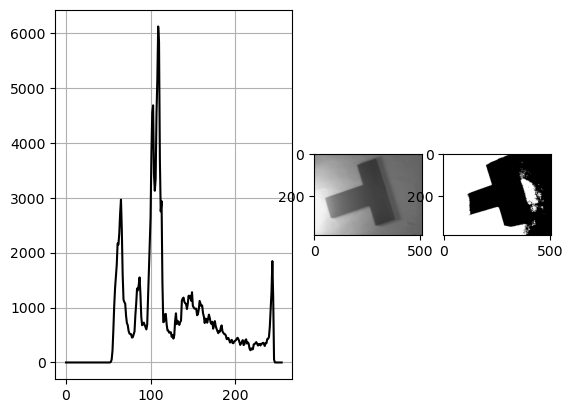

In [21]:
# This cell clearly shows the issues with poor quality lighting. 
# The example shows why we must have some kind of adaptive thresolding

im4 = cv2.imread('poor_lighting.jpg', cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([im4], [0], None, [256], [0, 256])

plt.subplot(1,4,(1,2)); plt.plot(hist, 'k'); plt.grid()
plt.subplot(1,4,3); plt.imshow(im4, vmin = 0, vmax = 255)
_,t_img = cv2.threshold(im4, 110, 255, cv2.THRESH_BINARY)
plt.subplot(1,4,4); plt.imshow(t_img)


Let's now look at an example where the 1D array would necessitate a non-uniform thresholding

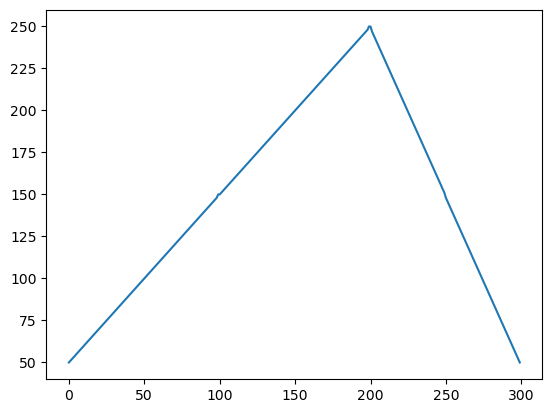

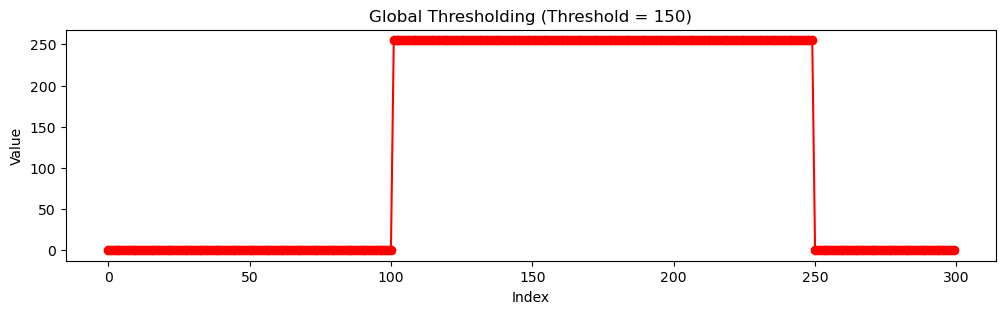

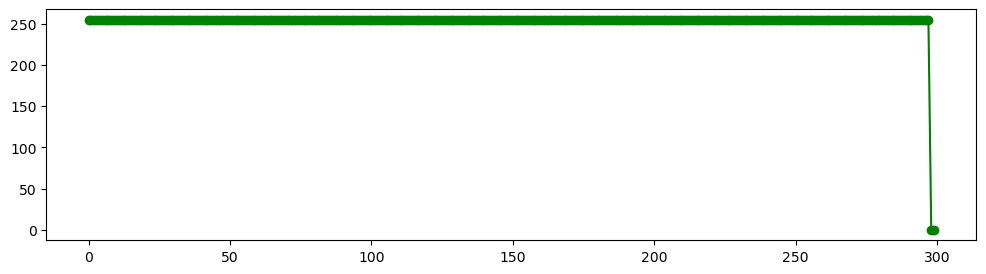

In [22]:
linear_array = np.concatenate([
    np.linspace(50, 150, num=100),  # Gradually increasing part
    np.linspace(150, 250, num=100), # Bright part
    np.linspace(250, 50, num=100)   # Gradually decreasing part
]).astype(np.uint8)
plt.plot(linear_array)

threshold_value = 150
_, global_thresh_array = cv2.threshold(linear_array, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 3))
plt.plot(global_thresh_array, 'o-', color='red')
plt.title(f'Global Thresholding (Threshold = {threshold_value})')
plt.xlabel('Index')
plt.ylabel('Value')

linear_array_2d = linear_array.reshape(1, -1)

adaptive_thresh_array = cv2.adaptiveThreshold(linear_array_2d, 255, 
                                              cv2.ADAPTIVE_THRESH_MEAN_C, 
                                              cv2.THRESH_BINARY, 
                                              blockSize=11, C=2)

adaptive_thresh_array = adaptive_thresh_array.flatten()

plt.figure(figsize=(12, 3))
plt.plot(adaptive_thresh_array, 'o-', color='green')

Let's now apply adaptive threshold to the poor lighting example: 

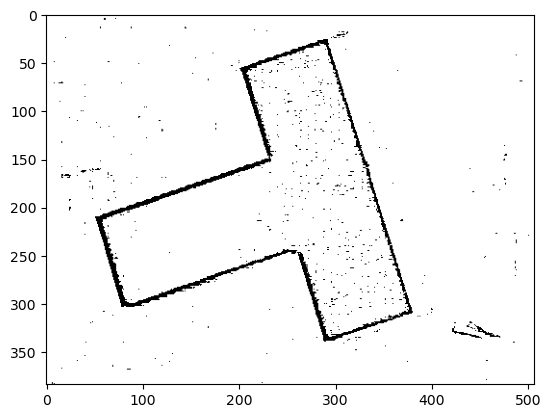

In [23]:
im4 = cv2.imread('poor_lighting.jpg', cv2.COLOR_BGR2GRAY) #should use cv2.IMREAD_GRAYSCALE directly instead
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY)
aim4 = cv2.adaptiveThreshold(im4, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=3)
plt.imshow(aim4)

In [31]:
im4 = cv2.imread('poor_lighting.jpg', cv2.COLOR_BGR2GRAY) #should use cv2.IMREAD_GRAYSCALE directly instead
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY)
def get_adapt(blockSize = 9, C = 3):
    aim4 = cv2.adaptiveThreshold(im4, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=blockSize, C=C)
    plt.imshow(aim4)
    plt.show()

w = interactive(get_adapt, blockSize = (3,11,2), C = (1,6,1))
w

interactive(children=(IntSlider(value=9, description='blockSize', max=11, min=3, step=2), IntSlider(value=3, d…

Let's see how to process a simple 2D array: 

In [25]:
import numpy as np

import numpy as np

# Create a 21x21 2D array with varying intensity values
array_2d = np.array([
    [30, 32, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125],
    [35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135],
    [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140],
    [45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145],
    [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150],
    [55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155],
    [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160],
    [65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165],
    [70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 255, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170],
    [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175],
    [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180],
    [85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185],
    [90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190],
    [95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195],
    [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    [105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205],
    [110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210],
    [115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215],
    [120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220],
    [125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225],
    [130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230]
])

print("Original 21x21 2D Array:")
print(array_2d)


# Parameters
block_size = 3
C = 5

# Pad the array to handle borders
padded_array = np.pad(array_2d, pad_width=block_size//2, mode='constant', constant_values=0)

# Output array to store the result
adaptive_result = np.zeros_like(array_2d)

# Loop over each pixel in the original array
for i in range(array_2d.shape[0]):
    for j in range(array_2d.shape[1]):
        # Extract the 3x3 block around the current pixel
        block = padded_array[i:i+block_size, j:j+block_size]
        
        # Calculate the mean of the block
        local_mean = np.mean(block)
        
        # Calculate the local threshold by subtracting C
        local_threshold = local_mean - C
        
        # Apply the threshold to the current pixel
        if array_2d[i, j] > local_threshold:
            adaptive_result[i, j] = 255
        else:
            adaptive_result[i, j] = 0

# Print the original array and the adaptive threshold result
print("Original  Array:")
print(array_2d)
print("\nAdaptive Thresholding Result (Manual Calculation):")
print(adaptive_result)


Original 21x21 2D Array:
[[ 30  32  35  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110
  115 120 125]
 [ 35  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110 115 120
  125 130 135]
 [ 40  45  50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125
  130 135 140]
 [ 45  50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130
  135 140 145]
 [ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
  140 145 150]
 [ 55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135 140
  145 150 155]
 [ 60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135 140 145
  150 155 160]
 [ 65  70  75  80  85  90  95 100 105 110 115 120 125 130 135 140 145 150
  155 160 165]
 [ 70  75  80  85  90  95 100 105 110 115 255 125 130 135 140 145 150 155
  160 165 170]
 [ 75  80  85  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160
  165 170 175]
 [ 80  85  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165
  170 175 1

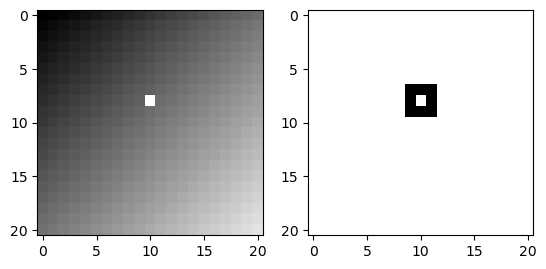

In [26]:
plt.subplot(1,2,1); plt.imshow(array_2d)
plt.subplot(1,2,2); plt.imshow(adaptive_result)

interactive(children=(FloatSlider(value=2.0, description='x0', max=5.0, min=-2.0, step=0.05), IntSlider(value=…

Let's look at affine transformation of images.  The equation for a transform affine applies to each pixel and is given by 

$\vec{x'} = \bar{\mathbf{A}}\cdot \vec{x} + \vec{t}$

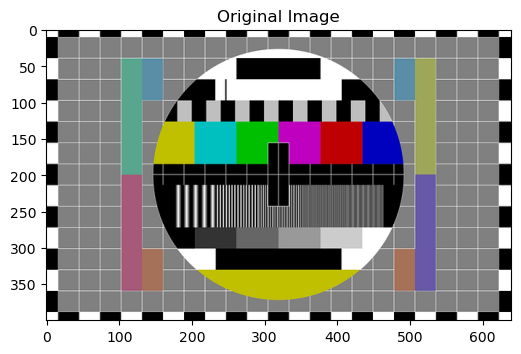

In [40]:
image = cv2.imread('test-pattern-152459_640.png') # We will use the TV test image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb); plt.title("Original Image")
plt.show()


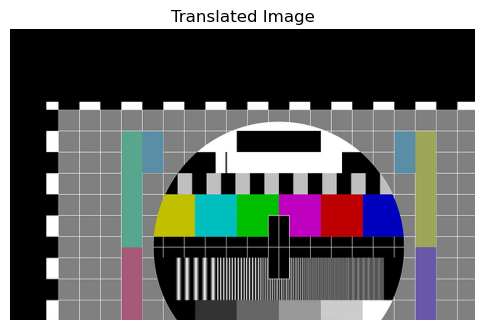

In [41]:
# ========== Translation ===========

tx, ty = 50, 100  # Translate by 50 pixels right and 100 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# Apply the translation
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (image.shape[1], image.shape[0]))

# Display the translated image
plt.figure(figsize=(6, 6))
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis('off')
plt.show()


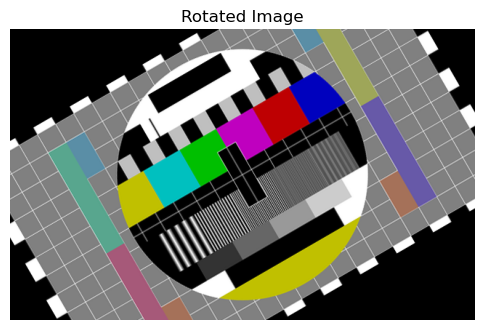

[[  0.8660254    0.5        -57.12812921]
 [ -0.5          0.8660254  186.79491924]]


In [49]:
# ========== Rotation ============
angle = 30  # Rotate by theta degrees
center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
scale = 1.0  # Keep the scale the same

# Create the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image.shape[1], image.shape[0]))

# Display the rotated image
plt.figure(figsize=(6, 6))
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')
plt.show()

print(rotation_matrix)


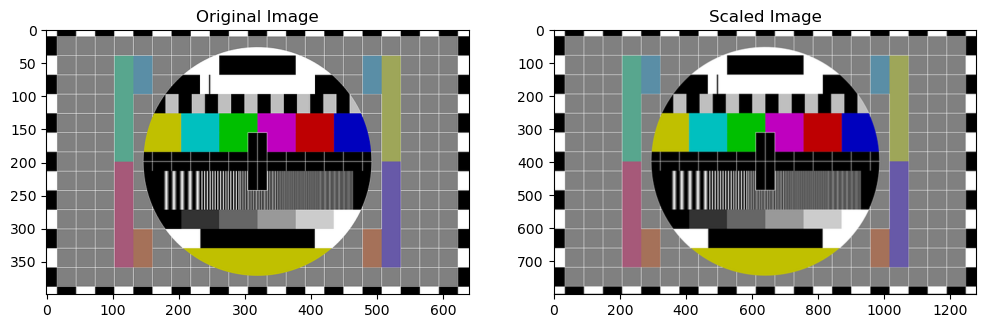

In [47]:
# ============ Scaling ============
# Scaling parameters
scale_x, scale_y = 2, 2  # Scale by 1.5 times in both directions

# Create the scaling matrix (it's a part of the affine transformation matrix)
scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])

# Apply the scaling
scaled_image = cv2.warpAffine(image_rgb, scaling_matrix, (int(image.shape[1] * scale_x), int(image.shape[0] * scale_y)))

# Display the original image
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
# Display the scaled image
plt.subplot(1,2,2)
plt.imshow(scaled_image)
plt.title("Scaled Image")
plt.show()
